# MNISTClustering 
Clustering or automatic grouping allows you to find group structures in the data. This notebook presents different algorithms using the very classical MNIST dataset. This dataset contains handwritten numbers digitized as 8 pixels by 8 pixels images. We will implement the three clustering algorithms that we have seen  seen thanks to the scikit-learn library. And we will  visualize the results obtained. We will start by loading the libraries we need and loading the dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, normalized_mutual_info_score,pairwise_distances

%matplotlib inline
np.random.seed(42)

# load the data their are given in the sklearn library
digits = load_digits()

# centering and scaling of digits.data ?
data = scale(digits.data)
# not necessary since the feature are all pixel intensities values
data = digits.data

# data set size
n_samples, n_features = data.shape

# number of digits ?
n_digits = len(np.unique(digits.target))

# true labels of the images
labels = digits.target

print("n_digits: %d, \t n_samples %d, \t n_features %d" % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1797, 	 n_features 64


This one thus contains 1797 images (put in the form of vectors of size 8x8=64) and we know that they correspond to 10 natural groups corresponding to the numbers 0,1,2,...,9. This information is usually not known in a clustering problem. Let's start by defining a small function to display some data in a more natural image form.

In [3]:
def plot_data(centers,vmin,vmax):
    f, axarr = plt.subplots(1,centers.shape[0], sharex=True,sharey=True)
    for i in range(centers.shape[0]):
        axarr[i].imshow(centers[i,].reshape([8,8]),cmap='Greys',clim=(vmin, vmax),interpolation='nearest')
        axarr[i].set( aspect='equal')
        axarr[i].get_xaxis().set_visible(False)
        axarr[i].get_yaxis().set_visible(False)

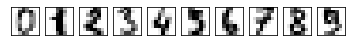

In [4]:
plot_data(digits.data[0:10,],0,16)

We find our handwritten figures in low definition. Let's now try to see what a k-means would give on these data.

## K-means

We have loaded the KMeans class, so we can now define an instance with K=10 to avoid falling into a local minimum we will run the algorithm 10 times (n_init=10). To execute the algorithm we just have to use the fit method which takes as arguments the data to cluster.

In [20]:
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(digits.data)

KMeans(n_clusters=10)

We can now observe the centers of the clusters found by the algorithm. They are located in the slot cluster_centers.

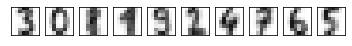

In [21]:
plot_data(kmeans.cluster_centers_,0,16)

We find the different figures as we expected. These are permuted, it's normal, the order of the clusters returned by k-emans depends on the initialization of the algorithm which is random. We can now compare the obtained clusters to the "real" labels of the dataset to get an idea. To do this we will compute the confusion matrix (contingency table).

In [22]:
import pandas as pd
pd.DataFrame(confusion_matrix(labels,kmeans.labels_))

,0,1,2,3,4,5,6,7,8,9
0,0,177,0,0,0,0,1,0,0,0
1,1,0,99,55,0,24,0,0,2,1
2,13,1,8,2,2,148,0,3,0,0
3,154,0,7,0,13,0,0,7,0,2
4,0,0,3,5,0,0,164,9,0,0
5,0,0,0,0,43,0,2,0,1,136
6,0,1,2,1,0,0,0,0,177,0
7,0,0,2,2,0,0,0,174,0,1
8,2,0,100,6,52,3,0,5,2,4
9,6,0,2,20,139,0,0,7,0,6


The clusters found correspond to the expected structure some noise. We may resume the adequation with the true labels with the normalized mutual information score.

In [23]:
normalized_mutual_info_score(labels,kmeans.labels_) 

0.7434906962114695

## Agglomerative clustering

To make a cah with scikit-learn you just have to specify the type of clustering criteria to use and if you want to obtain a classification the number of clusters you want to cut the abre according to.

In [24]:
cah = AgglomerativeClustering(linkage="ward",n_clusters=10)
cah.fit(digits.data)

AgglomerativeClustering(n_clusters=10)

We don't have a center for each group as for the directly accessible k-means but we can display a sample of the cluster members the number 3 for example and previously calculate the confusion matrix and the mutual information between the clustering results and the varis labels.

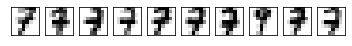

In [25]:
ex_c = digits.data[cah.labels_==3]
plot_data(ex_c[:10,],0,16)

In [26]:
pd.DataFrame(confusion_matrix(labels,cah.labels_))

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,178,0,0
1,0,0,27,0,0,0,0,0,59,96
2,0,0,166,1,10,0,0,0,0,0
3,0,169,0,1,13,0,0,0,0,0
4,0,0,0,3,0,178,0,0,0,0
5,179,2,0,0,0,0,1,0,0,0
6,0,0,0,0,1,0,180,0,0,0
7,0,0,0,179,0,0,0,0,0,0
8,0,1,4,1,165,0,0,0,1,2
9,2,145,0,11,2,0,0,0,20,0


In [27]:
normalized_mutual_info_score(labels,cah.labels_) 

0.8681701126909084

# DB-Scan

To use dbscan we need to define two parameters : a minimum number of points (a minimum density level) and the radius of the ball with which we are going to define the neighborhood. To help us to fix it we can plot the histogram of the distances to the nearest 25 neighbor for a sample of 300 data.

In [28]:
min_samples=25
distances=pairwise_distances(digits.data[np.random.choice(digits.data.shape[0], 300, replace=False),],digits.data)
dd=np.apply_along_axis(lambda l: np.sort(l)[min_samples], 1, distances)


(array([ 8., 15., 36., 50., 80., 55., 25., 20.,  8.,  3.]),
 array([17.        , 19.13144881, 21.26289762, 23.39434644, 25.52579525,
        27.65724406, 29.78869287, 31.92014168, 34.0515905 , 36.18303931,
        38.31448812]),
 <BarContainer object of 10 artists>)

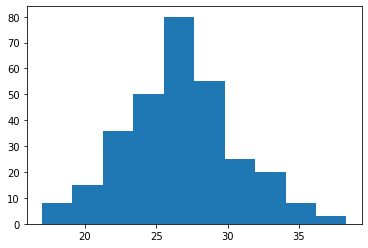

In [29]:
plt.hist(dd)

In [30]:
db = DBSCAN(eps=20,min_samples=10)
db.fit_predict(digits.data)
db.labels_

array([ 0,  6, -1, ..., -1, -1, -1])

In [31]:
pd.DataFrame(confusion_matrix(labels,db.labels_))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12,166,0,0,0,0,0,0,0,0,0,0,0,0,0
2,64,0,0,0,13,0,0,79,0,0,0,8,18,0,0
3,80,0,0,0,0,0,0,0,0,83,0,0,0,0,14
4,77,0,0,0,0,106,0,0,0,0,0,0,0,0,0
5,67,0,0,114,0,0,0,0,0,0,0,0,0,0,0
6,140,0,0,0,0,0,0,0,18,0,0,0,0,24,0
7,17,0,163,0,0,0,0,1,0,0,0,0,0,0,0
8,75,0,0,0,0,0,104,0,0,0,0,0,0,0,0
9,172,0,0,0,0,0,0,2,0,0,0,0,0,0,0


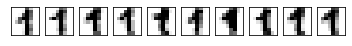

In [32]:
ex_c = digits.data[db.labels_==3]
plot_data(ex_c[0:10,],0,16)

In [33]:
normalized_mutual_info_score(labels,db.labels_) 

0.6217728614950621

If you increase the min_samples parameter the extracted clusters are almost exclusively made up of identical numbers, on the other hand some numbers of data are classified in the noise cluster.

##  PCA to show clustering results

In [34]:
from sklearn import decomposition
from sklearn import datasets

X = digits.data
y = db.labels_

pca = decomposition.PCA(n_components=6)
pca.fit(X)
Xp = pca.transform(X)

### Projection on the 2 first principal components 

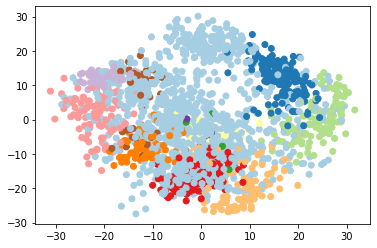

In [35]:
f=plt.scatter(Xp[:, 0], Xp[:, 1], c=y, cmap=plt.cm.Paired)

### Projection on 1st and 3rd principal components 

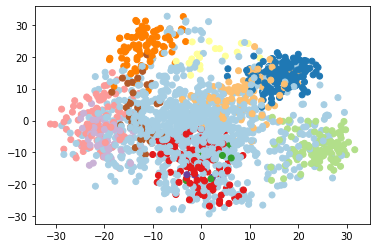

In [36]:
f=plt.scatter(Xp[:, 0], Xp[:, 2], c=y, cmap=plt.cm.Paired)

### What do the projection vectors look like on the main components?

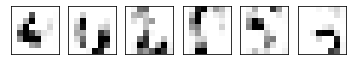

In [37]:
plot_data(pca.components_,0,0.2)

## What more can be done?
### 1) Look at the percentage of variance explained by major components 

Look at the fields stored in the object pca




So the first pincipal component explain around 15% of the variance.

### 2) Visualize the results of k-means and cah in 10 groups on the 2 main components

Re-draw the figure of the point cloud on the two principale components visualize the results of the algorithm of clustering with the colors


### 3) Look at the evolution of the k-means criterion as a function of the number of groups

Make a loop on k and store the value of the criterion 'inertia_' in a vector then make a graph.